<img src='images/covid19.png' >

# <center> **Data visualization** </center>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных. 

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков. 

### <center> Как визуализировать данные и заставить всех тебя ненавидеть </center>

1. Заголовок графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не подписывай ни одной оси у графика. Пусть смотрящий развивает свою интуицую! 
3. Единицы измерения совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше шрифт на графике, тем острее зрение смотрящего. 
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста, тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений. 

В качестве примера, рассмотрим кейс с пандемией. Воспользуемся датасетом с оперативно обновляемой статистикой по коронавирусу (COVID-19), который выложен в открытом доступе на Kaggle: https://www.kaggle.com/c/covid19-global-forecasting-week-4/

А если серьезно, то обязательно посмотрите:

https://robjhyndman.com/hyndsight/graphics/

https://www.darkhorseanalytics.com/portfolio/data-looks-better-naked-bar-charts

https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-clear-off-the-table

https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-pie-charts

https://www.darkhorseanalytics.com/portfolio/w24s5qofnzm4wqmsdfq98kwx035tew

https://www.biostat.wisc.edu/~kbroman/presentations/IowaState2013/graphs_combined.pdf

https://www.biostat.wisc.edu/~kbroman/presentations/graphs_MDPhD2014.pdf

Основные библиотеки для визуализации в Python, которые нам сегодня понадобятся — это **matplotlib, seaborn, plotly**. 

In [1]:
# Установим вспомогательные пакеты
!pip3 install plotly-express
!pip3 install nbformat==4.2.0

     |████████████████████████████████| 235kB 807kB/s eta 0:00:01
     |████████████████████████████████| 7.2MB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 8.4MB 6.0MB/s eta 0:00:01     |█▍                              | 368kB 8.0MB/s eta 0:00:02
    Running setup.py install for retrying ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 153kB 697kB/s eta 0:00:01
ERROR: nbconvert 5.6.1 has requirement nbformat>=4.4, but you'll have nbformat 4.2.0 which is incompatible.
  Found existing installation: nbformat 4.4.0
    Uninstalling nbformat-4.4.0:
      Successfully uninstalled nbformat-4.4.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import pickle

# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' # Графики в svg выглядят четче

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

import warnings
warnings.filterwarnings('ignore')

Считаем данные и посмотрим количество стран в датасете и какие дни он покрывает. 

In [11]:
data = pd.read_csv('covid19_data/train.csv')
data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
27226,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0
27227,35652,NaN,Zimbabwe,2020-04-14,17.0,3.0
27228,35653,NaN,Zimbabwe,2020-04-15,23.0,3.0
27229,35654,NaN,Zimbabwe,2020-04-16,23.0,3.0


In [12]:
print("Количество стран:", data['Country_Region'].nunique())
print("Дни с {} по {}, всего {} дней.".format(min(data['Date']), 
                                          max(data['Date']), 
                                          data['Date'].nunique()))

Количество стран: 184
Дни с 2020-01-22 по 2020-04-17, всего 87 дней.


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              27231 non-null  int64  
 1   Province_State  11571 non-null  object 
 2   Country_Region  27231 non-null  object 
 3   Date            27231 non-null  object 
 4   ConfirmedCases  27231 non-null  float64
 5   Fatalities      27231 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
# Поменяем формат даты из str в pd.Timestamp  
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              27231 non-null  int64         
 1   Province_State  11571 non-null  object        
 2   Country_Region  27231 non-null  object        
 3   Date            27231 non-null  datetime64[ns]
 4   ConfirmedCases  27231 non-null  float64       
 5   Fatalities      27231 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [34]:
data.rename({'ConfirmedCases':'Confirmed_Cases'}, axis='columns', inplace=True)

In [35]:
# Выведем последнюю статистику по России 
data[data.Country_Region == 'Russia'].tail()

,Id,Province_State,Country_Region,Date,Confirmed_Cases,Fatalities
17830,23339,NaN,Russia,2020-04-13,18328.0,148.0
17831,23340,NaN,Russia,2020-04-14,21102.0,170.0
17832,23341,NaN,Russia,2020-04-15,24490.0,198.0
17833,23342,NaN,Russia,2020-04-16,27938.0,232.0
17834,23343,NaN,Russia,2020-04-17,32008.0,273.0


Пандемия коронавируса — это наглядный пример экспоненциального распределения. Чтобы это продемонстрировать, построим график по общему числу заразившихся и погибших. Мы будем использовать линейный тип графика (**Line Chart**), которые может отражать динамику по одному или нескольким показателям. Его удобно использовать, чтобы посмотреть, как величина меняется во времени. 
Возьмем переменные *ConfirmedCases* и *Fatalities*. 

In [37]:
data[['Confirmed_Cases', 'Fatalities', 'Date']].groupby('Date').sum()

,Confirmed_Cases,Fatalities
Date,,
2020-01-22,554.0,17.0
2020-01-23,653.0,18.0
2020-01-24,939.0,26.0
2020-01-25,1432.0,42.0
2020-01-26,2113.0,56.0
...,...,...
2020-04-13,1904662.0,119480.0
2020-04-14,1976015.0,125982.0
2020-04-15,2055876.0,134175.0


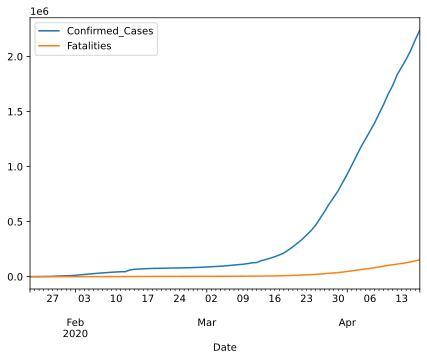

In [38]:
data[['Confirmed_Cases', 'Fatalities', 'Date']].groupby('Date').sum().plot(); 
# символ ';' прячет первую строку Text из графика 

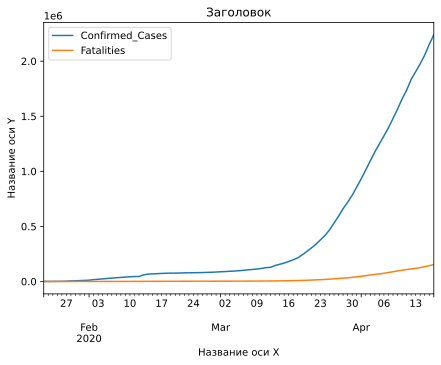

In [39]:
ax = data[['Confirmed_Cases', 'Fatalities', 'Date']].groupby('Date').sum().plot(title='Заголовок')
ax.set_xlabel("Название оси X")
ax.set_ylabel("Название оси Y");

(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text major ticklabel objects>)

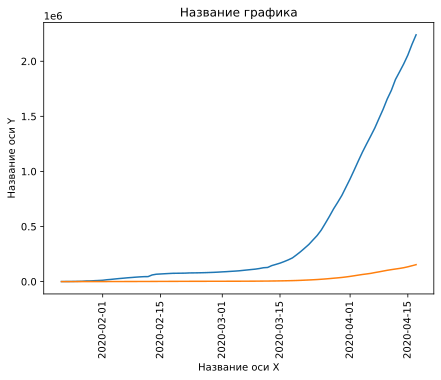

In [41]:
# Код для аналогичного Line chart на matplotlib
plt.plot(data[['Confirmed_Cases', 'Fatalities', 'Date']].groupby('Date').sum())
plt.title('Название графика')
plt.xlabel('Название оси X')
plt.ylabel('Название оси Y')
plt.xticks(rotation=90)

График выше показывает нам общую информацию по всему миру. Давайте выделим 10 наиболее пострадавших стран (по итогам последнего дня из датасета) и на одном **Line Chart** покажем данные по каждой из них по числу зарегистрированных случаев болезни. В этот раз, попробуем воспользоваться библиотекой **plotly**. 

In [47]:
# Выделим топ-10 стран по количеству подтвержденных случаев 
df_top = data[data['Date'] == max(data['Date'])] # на последнюю дату
df_top = df_top.groupby('Country_Region', as_index=False)['Confirmed_Cases'].sum()
df_top = df_top.nlargest(10,'Confirmed_Cases')
df_top

,Country_Region,Confirmed_Cases
171,US,699541.0
156,Spain,190839.0
84,Italy,172434.0
61,France,149130.0
65,Germany,141397.0
175,United Kingdom,109769.0
36,China,83760.0
80,Iran,79494.0
170,Turkey,78546.0
16,Belgium,36138.0


In [48]:
# Выделим тренд с учетом времени
df_trend = data.groupby(['Date','Country_Region'], as_index=False)['Confirmed_Cases'].sum()
df_trend

,Date,Country_Region,Confirmed_Cases
0,2020-01-22,Afghanistan,0.0
1,2020-01-22,Albania,0.0
2,2020-01-22,Algeria,0.0
3,2020-01-22,Andorra,0.0
4,2020-01-22,Angola,0.0
...,...,...,...
16003,2020-04-17,Vietnam,268.0
16004,2020-04-17,West Bank and Gaza,402.0
16005,2020-04-17,Western Sahara,6.0
16006,2020-04-17,Zambia,52.0


In [52]:
# Сделаем inner join
df_1 = df_trend.merge(df_top, on='Country_Region', how="inner")
df_1

,Date,Country_Region,Confirmed_Cases_x,Confirmed_Cases_y
0,2020-01-22,Belgium,0.0,36138.0
1,2020-01-23,Belgium,0.0,36138.0
2,2020-01-24,Belgium,0.0,36138.0
3,2020-01-25,Belgium,0.0,36138.0
4,2020-01-26,Belgium,0.0,36138.0
...,...,...,...,...
865,2020-04-13,United Kingdom,89570.0,109769.0
866,2020-04-14,United Kingdom,94845.0,109769.0
867,2020-04-15,United Kingdom,99483.0,109769.0
868,2020-04-16,United Kingdom,104145.0,109769.0


In [53]:
df_1.rename(columns={'Country_Region' : 'Countries', 
                     'Confirmed_Cases_x':'Cases',
                     'Date' : 'Dates'}, 
            inplace=True)
df_1

,Dates,Countries,Cases,Confirmed_Cases_y
0,2020-01-22,Belgium,0.0,36138.0
1,2020-01-23,Belgium,0.0,36138.0
2,2020-01-24,Belgium,0.0,36138.0
3,2020-01-25,Belgium,0.0,36138.0
4,2020-01-26,Belgium,0.0,36138.0
...,...,...,...,...
865,2020-04-13,United Kingdom,89570.0,109769.0
866,2020-04-14,United Kingdom,94845.0,109769.0
867,2020-04-15,United Kingdom,99483.0,109769.0
868,2020-04-16,United Kingdom,104145.0,109769.0


In [54]:
# px — это сокращения заимпортированного plotly_express
px.line(df_1, 
        title='Рост числа выявленных случаев COVID-19',
        x='Dates', 
        y='Cases', 
        color='Countries')

Попробуем прологарифмировать признак количества выявленных случаев и построить график еще раз. 

In [55]:
# Добавим столбец для визуализации логарифмического 
df_1['ln(Cases)'] = np.log(df_1['Cases'] + 1) # Добавляем 1 для случая log(0)
df_1

,Dates,Countries,Cases,Confirmed_Cases_y,ln(Cases)
0,2020-01-22,Belgium,0.0,36138.0,0.000000
1,2020-01-23,Belgium,0.0,36138.0,0.000000
2,2020-01-24,Belgium,0.0,36138.0,0.000000
3,2020-01-25,Belgium,0.0,36138.0,0.000000
4,2020-01-26,Belgium,0.0,36138.0,0.000000
...,...,...,...,...,...
865,2020-04-13,United Kingdom,89570.0,109769.0,11.402787
866,2020-04-14,United Kingdom,94845.0,109769.0,11.460010
867,2020-04-15,United Kingdom,99483.0,109769.0,11.507752
868,2020-04-16,United Kingdom,104145.0,109769.0,11.553549


In [57]:
px.line(df_1, 
        x='Dates', 
        y='ln(Cases)', 
        color='Countries', 
        title='COVID19 Total Cases growth for top 10 worst affected countries (Logarithmic Scale)')

Какие интересные выводы вы можете сделать по этому графику?

У большиснтва стран количество заболевших монотонно возрастает, но в случае с Китаем уже наблюдается затухание. 

Еще один популярный график - круговая диаграмма (**Pie chart**). Чаще всего, этот график используют для визуализации отношения частей и целого. 

Никогда не используйте его по доброй воле. Благородные Доны и Доньи строят круговые диаграммы только под угрозой расстрела. Или, если приковали наручниками к батарее!

https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-pie-charts

In [ ]:
# Круговые диаграммы

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
labels_donut = [country for country in df_top.Country_Region]
fig.add_trace(go.Pie(labels=labels_donut, hole=.4, hoverinfo="label+percent+name", 
                     values=[cases for cases in df_top.ConfirmedCases], 
                     name="Доля", ), 1, 1)
labels_pie = [country for country in df_top.Country_Region]
fig.add_trace(go.Pie(labels=labels_pie, pull=[0, 0, 0.2, 0], 
                     values=[cases for cases in df_top.ConfirmedCases], 
                     name="Доля"), 1, 2)

fig.update_layout(
    title_text="Donut & Pie Chart: Распределение долей по заболевшим COVID-19 среди топ-10 стран",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text=' ', x=0.5, y=0.5, font_size=16, showarrow=False)],
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)', 'rgb(209, 86, 42)', 'rgb(209, 42, 42)', ])
fig.show()

На линейных графиках выше мы визуализировали совокупную информацию по странам по количеству выявленных заболевших. Теперь, давайте попробуем построить график по дневному тренду, посчитав разницу между текущим значением и значением предыдущего дня.
Для этой цели, воспользуемся гистограммой (**Histogram**). Также, добавим указатели по ключевым событиям, например, даты lockdown в провинции Ухань в Китае, Италии и Великобритании. 

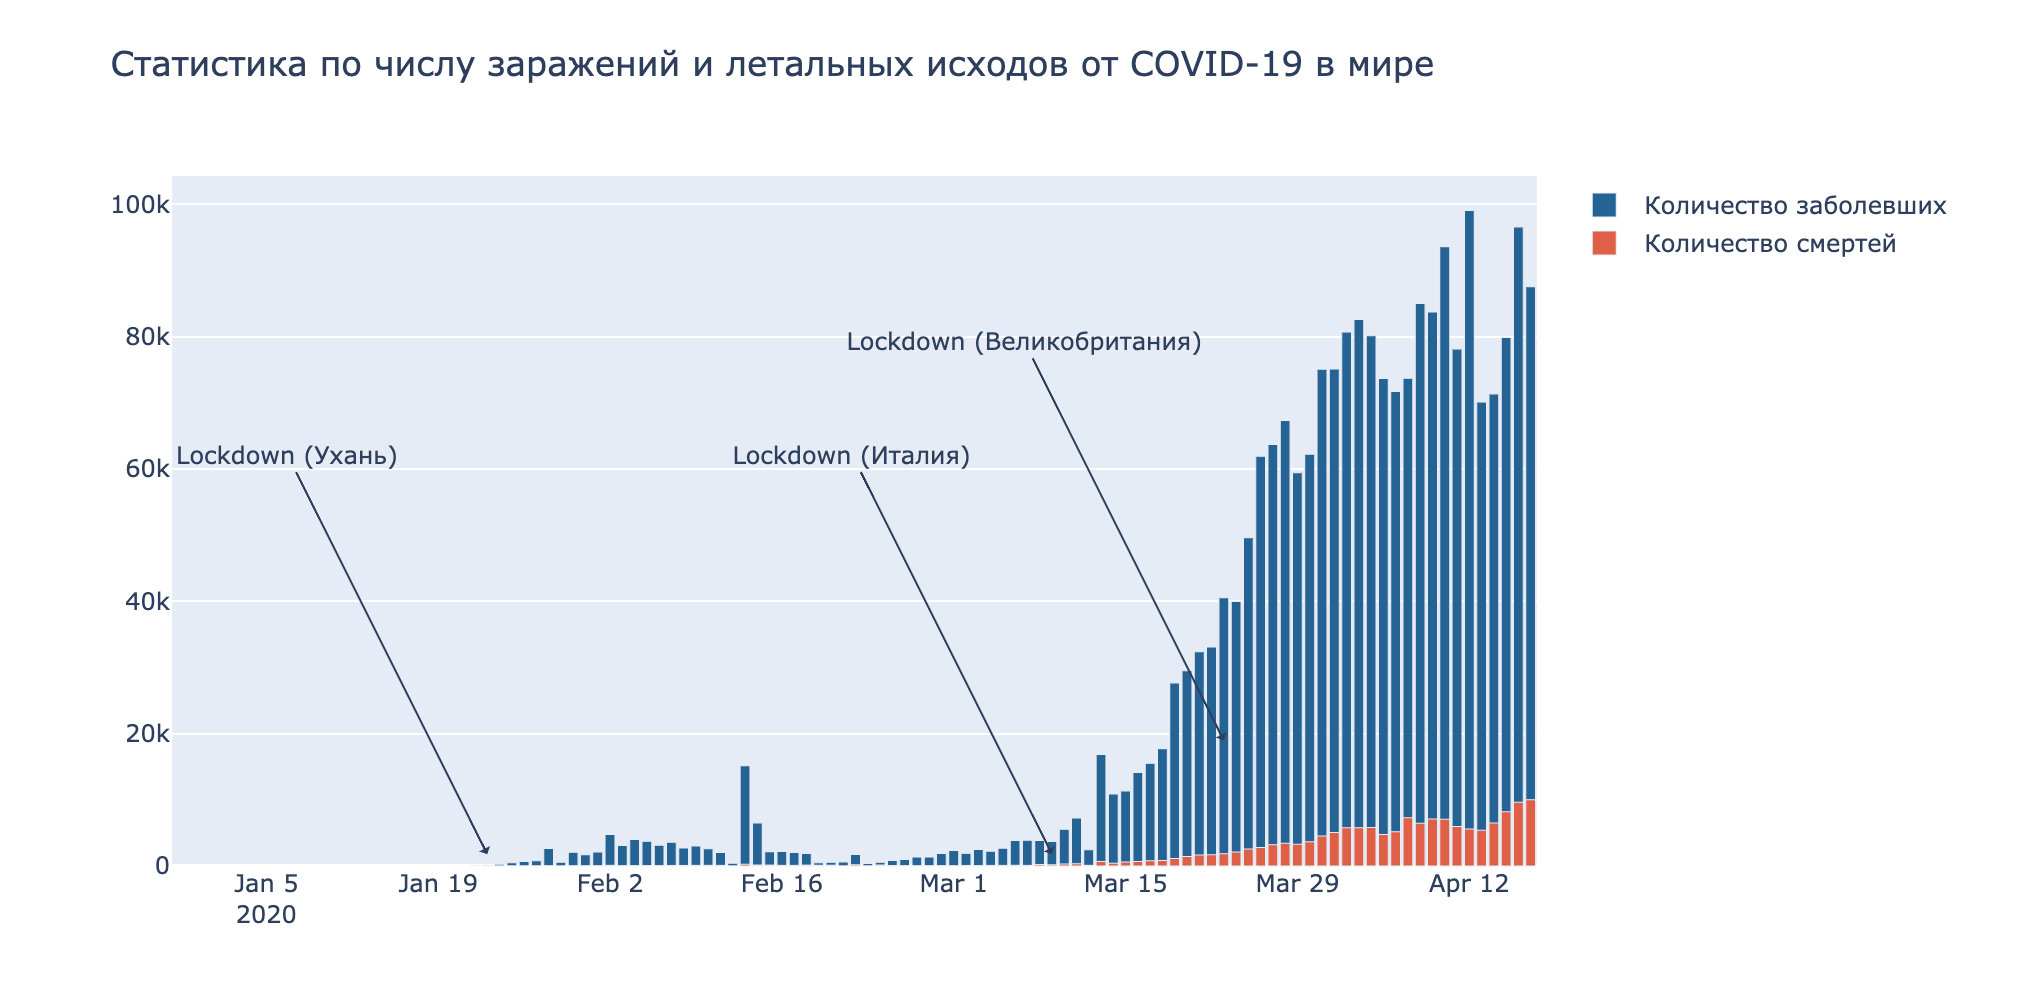

In [38]:
# Гистограммы

def add_daily_diffs(df):
    # Первой строке присваиваем 0, потому что предыдущее значение неизвестно
    df.loc[0,'Cases_daily'] = 0
    df.loc[0,'Deaths_daily'] = 0
    for i in range(1, len(df)):
        df.loc[i,'Cases_daily'] = df.loc[i,'ConfirmedCases'] - df.loc[i - 1,'ConfirmedCases']
        df.loc[i,'Deaths_daily'] = df.loc[i,'Fatalities'] - df.loc[i - 1,'Fatalities']
    return df

df_world = data.groupby('Date', as_index=False)['Fatalities', 'ConfirmedCases'].sum()
df_world = add_daily_diffs(df_world)

fig = go.Figure(data=[
    go.Bar(name='Количество заболевших',
           marker={'color': 'rgb(0,100,153)'},
           x=df_world.Date, 
           y=df_world.Cases_daily),
    go.Bar(name='Количество смертей', x=df_world.Date, y=df_world.Deaths_daily)
])

fig.update_layout(barmode='overlay', title='Статистика по числу заражений и летальных исходов от COVID-19 в мире',
                 annotations=[dict(x='2020-01-23', y=1797, text="Lockdown (Ухань)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-09', y=1797, text="Lockdown (Италия)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-23', y=19000, text="Lockdown (Великобритания)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200)])
fig.show()

In [111]:
# Можно сохранить график в статичном виде на компьютер
plotly.offline.plot(fig, filename='my_beautiful_histogram.html', show_link=False)

'my_beautiful_histogram.png.html'

Гистограмму часто путают со столбиковой диаграммой (Bar Chart) из-за визуального сходства, однако у этих графиков разные цели. Гиcтограмма пoказывает, как распределены данные в рамках непрерывного интервала или определенного периода времени. По вертикальной оси гистограммы находится частотность, по горизонтальной — интервалы или какой-то временной период.

Давайте теперь построим **Bar Chart**. Он бывает вертикальный и горизонтальный, выберем второй вариант. 
Построим график только для топ-20 стран по смертности. Будем рассчитывать эту статистику как отношение количества смертей к количеству подтвержденных заболевших по каждой стране. 

По некоторым странам в датасете статистика представлена по каждому региону (например, по всем штатам США). Для таких стран оставим только одно (максимальное) значение. Как вариант, можно было бы посчитать среднее по регионам и оставить его как показатель по стране.  

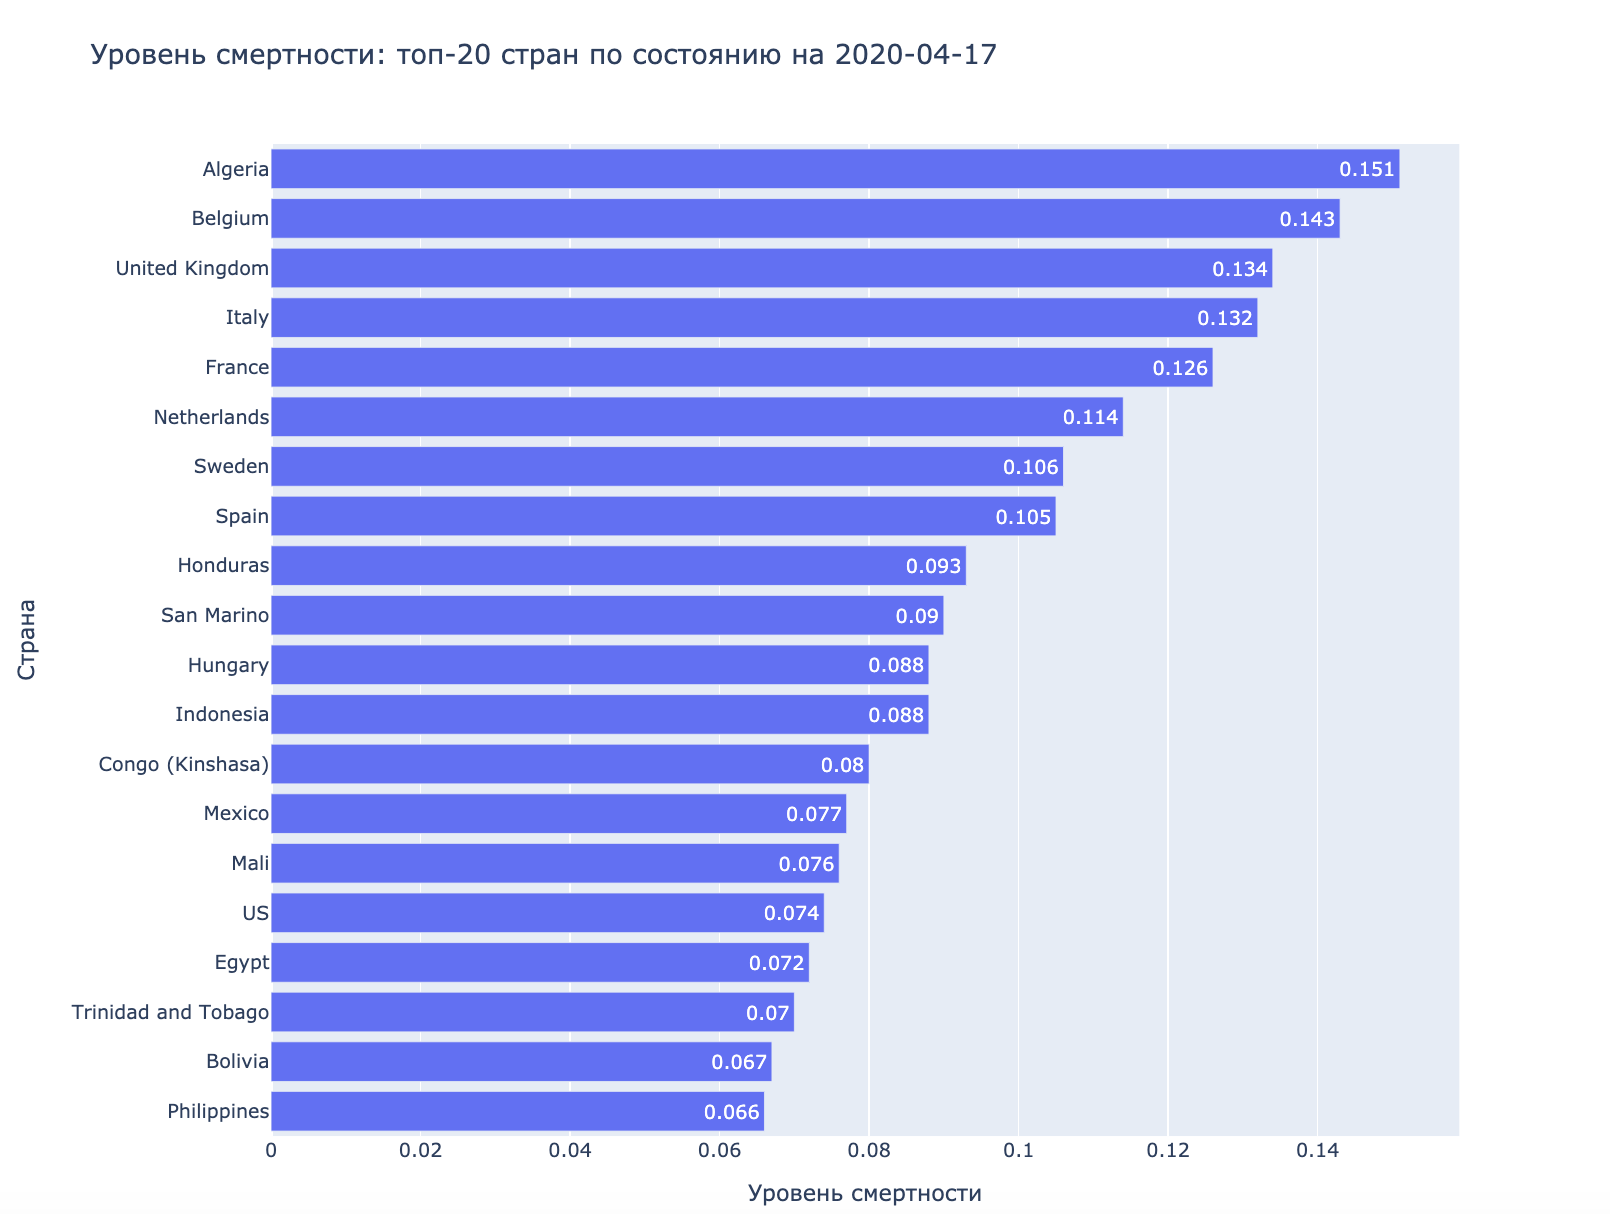

In [39]:
# Столбчатая диаграмма

df_mortality = data.query('(Date == "2020-04-17") & (ConfirmedCases > 100)') 
df_mortality['mortality'] = df_mortality['Fatalities'] / df_mortality['ConfirmedCases']
df_mortality['mortality'] = df_mortality['mortality'].apply(lambda x: round(x, 3))
df_mortality.sort_values('mortality', ascending=False, inplace=True)
# Оставим только максимальное значение смертности для стран, у которых статистика предоставлена по каждому региону
df_mortality.drop_duplicates(subset=['Country_Region'], keep='first', inplace=True)

fig = px.bar(df_mortality[:20].iloc[::-1],
             x='mortality', 
             y='Country_Region',
             labels={'mortality': 'Уровень смертности', 'Country_Region': 'Страна'},
             title=f'Уровень смертности: топ-20 стран по состоянию на 2020-04-17', 
             text='mortality', 
             height=800, 
             orientation='h') # горизонтальный
fig.show()

# TODO: раскрасить столбцы по тепловой карте (используя уровень смерности)
# Для этого добавьте аргументы color = 'mortality'

**Heat Maps** (тепловые карты) достаточно полезно использовать для дополнительная визуализации матриц корреляций между признаками. Когда признаков очень много, с помощью такого графика вы быстрее сможете оценить, какие признаки сильно скоррелировано или не обладают линейной взаимосвязью. 

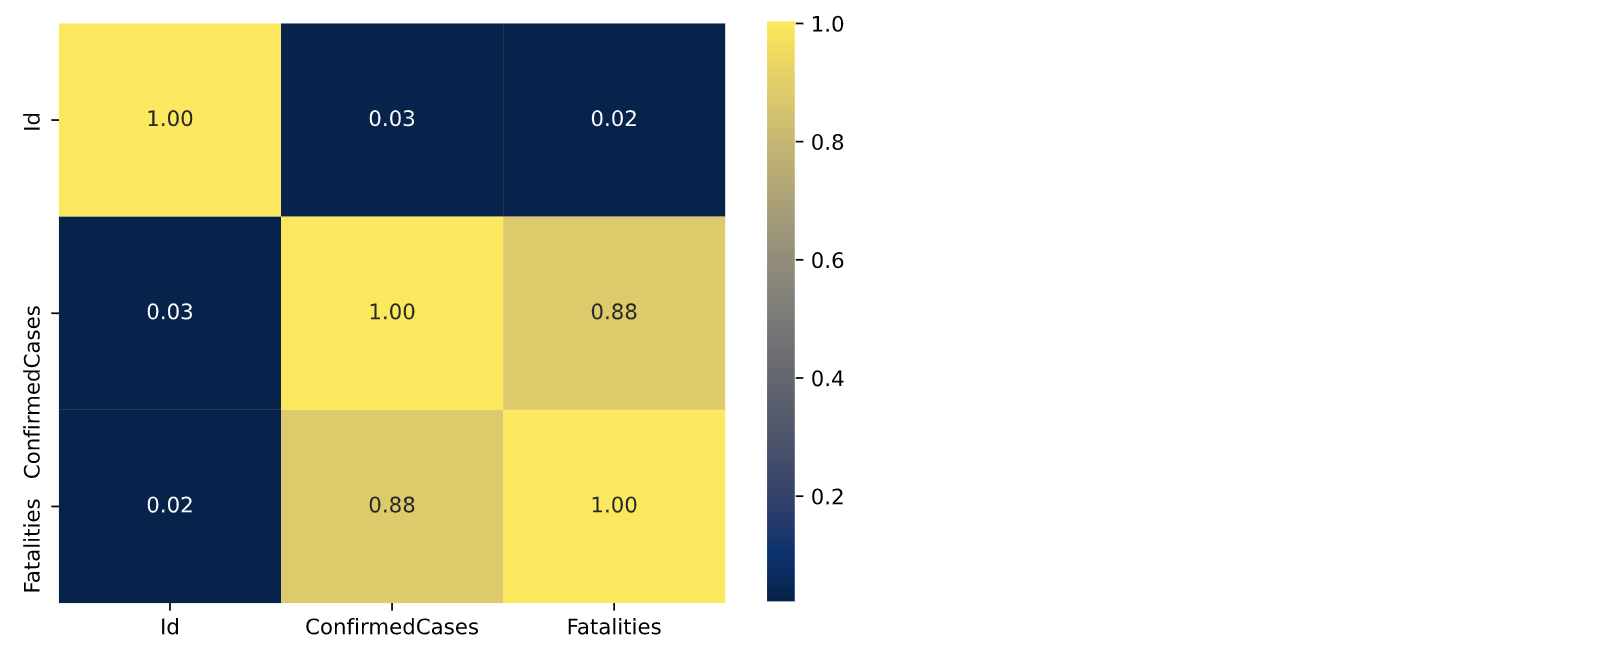

In [40]:
# Тепловая карта (используя seaborn) 
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='cividis'); # попробуйте другой цвет, например, 'RdBu'

График рассеяния помогает найти взаимосвязь между двумя показателями. Для этого, можно воспользоваться pairplot, который сразу выведет гистограмму по каждой переменной и диаграмму рассеяния по двум переменным (по разным осям графика). 

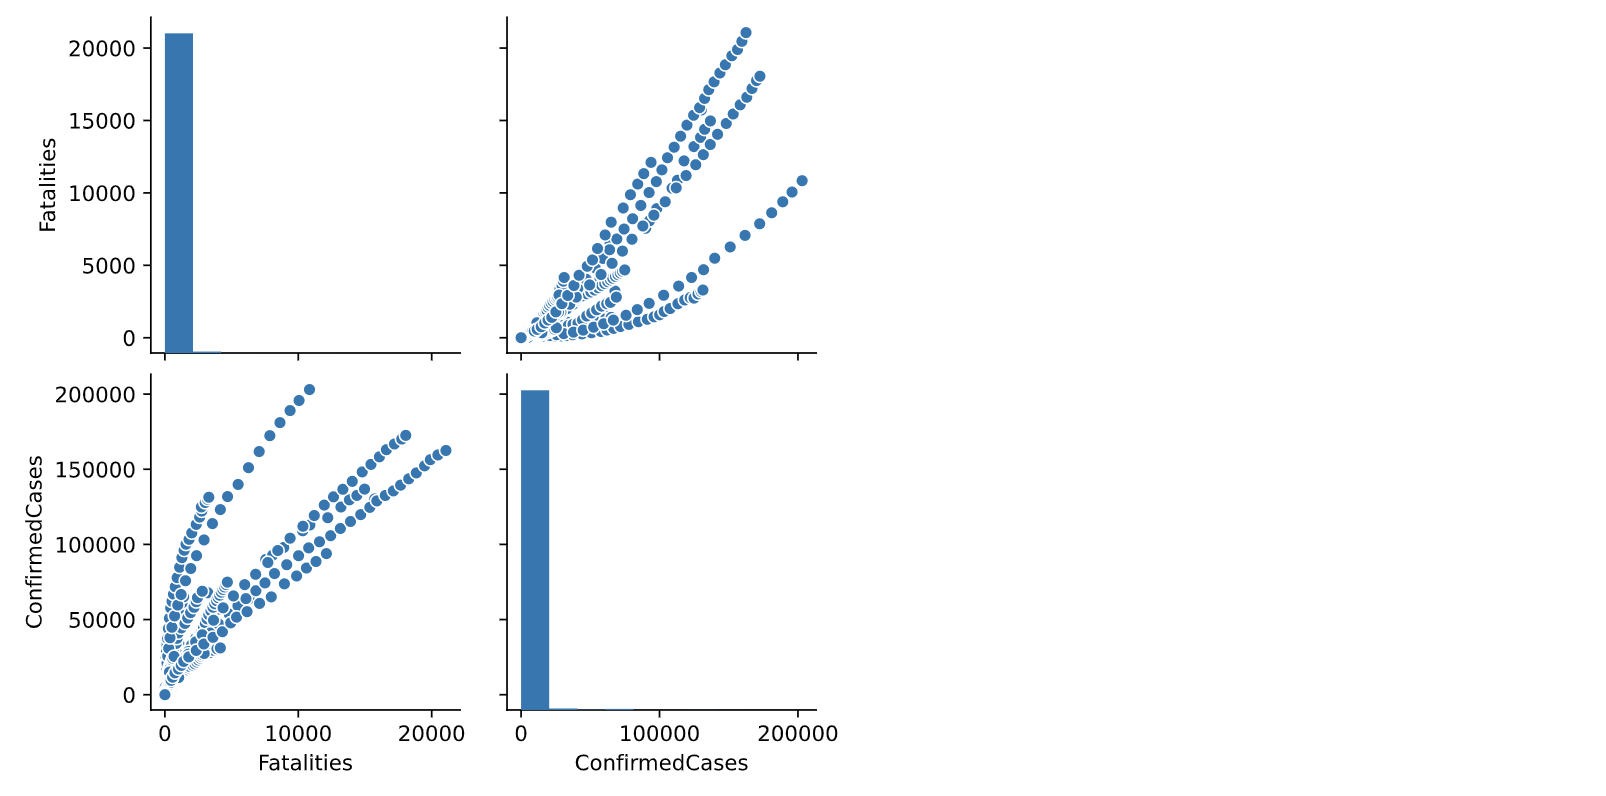

In [41]:
# Попарные двумерные распределений (pairplot)
sns_plot = sns.pairplot(data[['Fatalities', 'ConfirmedCases']])
sns_plot.savefig('pairplot.png') # сохранение картинки

При анализе данных, часто используют сводные таблицы. Сводная таблица (**Pivot table**) может автоматически сортировать, рассчитывать суммы или получить среднее значение из данных.

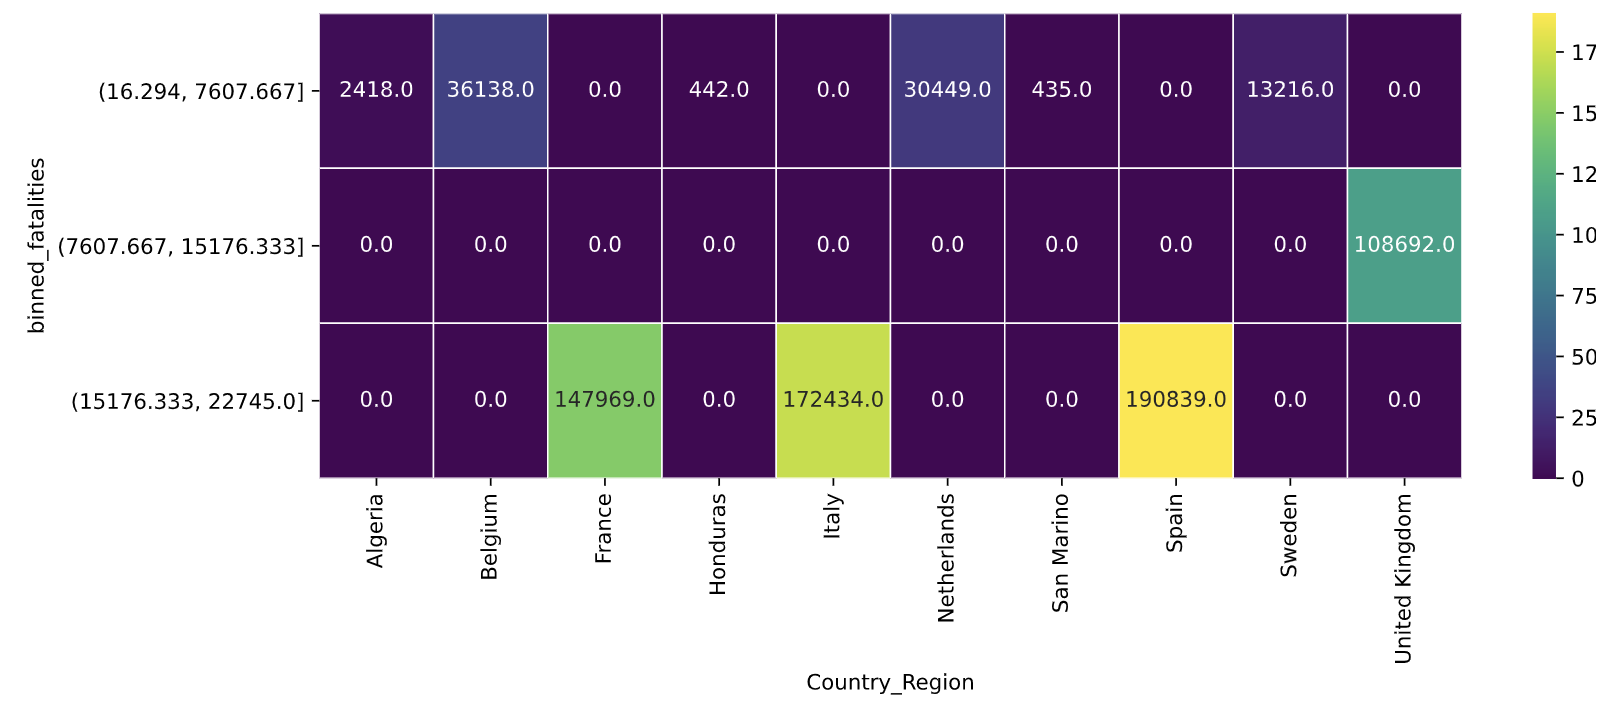

In [42]:
# Сводные таблицы

plt.figure(figsize=(12, 4))
df_new = df_mortality.iloc[:10]
df_new['ConfirmedCases'] = df_new['ConfirmedCases'].astype(np.int)
df_new['binned_fatalities'] = pd.cut(df_new['Fatalities'], 3)
platform_genre_sales = df_new.pivot_table(
                        index='binned_fatalities', 
                        columns='Country_Region', 
                        values='ConfirmedCases', 
                        aggfunc=sum).fillna(int(0)).applymap(np.int)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.7, cmap="viridis");

Фоновая картограмма (choropleth map) как раз нужна для таких данных,которые необходимо показать по странам или регионам. Дополнительно, можно использовать временную ось, чтобы рассмотреть изменение показателей в динамике. 

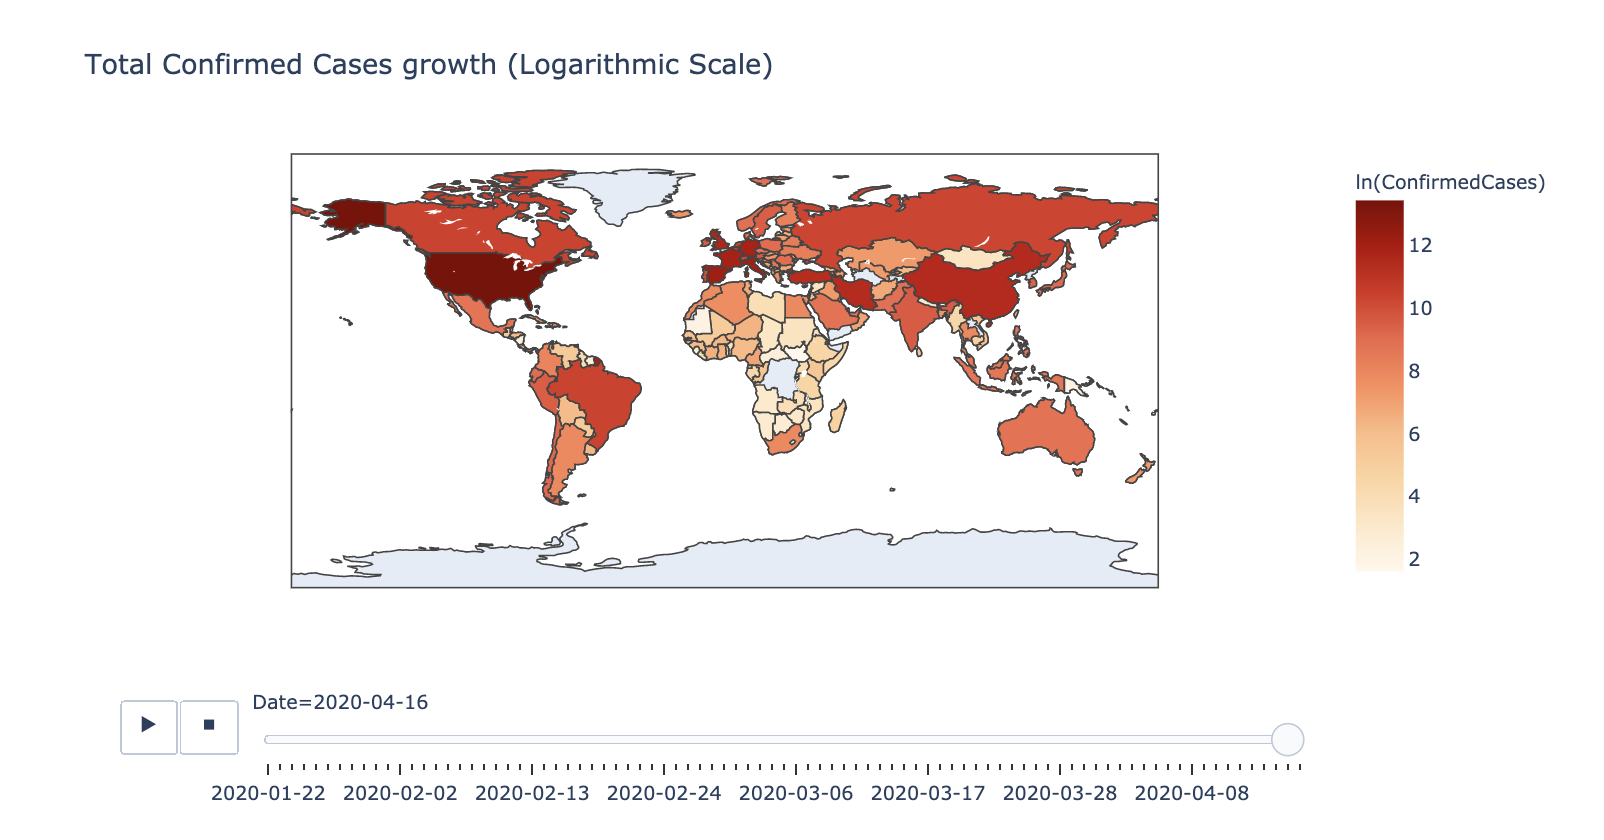

In [43]:
# Гео график (фоновая картограмма)

# В этом файле лежит словарь с аббревиатурами для стран
with open('countries_codes.pkl', 'rb') as file:
    countries_codes = pickle.load(file)
    
df_map = data.copy()
df_map['Date'] = data['Date'].astype(str)
df_map = df_map.groupby(['Date','Country_Region'], as_index=False)['ConfirmedCases','Fatalities'].sum()
df_map['iso_alpha'] = df_map['Country_Region'].map(countries_codes)
df_map['ln(ConfirmedCases)'] = np.log(df_map.ConfirmedCases + 1)
df_map['ln(Fatalities)'] = np.log(df_map.Fatalities + 1)

px.choropleth(df_map, 
              locations="iso_alpha", 
              color="ln(ConfirmedCases)", 
              hover_name="Country_Region",
              hover_data=["ConfirmedCases"],
              animation_frame="Date",
              color_continuous_scale=px.colors.sequential.OrRd,
              title = 'Total Confirmed Cases growth (Logarithmic Scale)')

Какую важную информацию дал новый график (визуализация по времени и геолокации)? Можно ли по графику ответить на вопросы:
* С какой страны началось распространение коронавируса?
* Какие страны наиболее пострадали от пандемии?
* На какую часть полушария приходится большинство случаев заболевания? Какие можно сформулировать гипотезы относительно температуры и скорости распространения вируса?

Какие еще наблюдения вы можете сделать из графика? 

### **Полезные материалы**

1. Руководство по библиотеке matplotlib https://matplotlib.org/3.2.1/tutorials/index.html 
2. Руководство по seaborn https://seaborn.pydata.org/tutorial.html
3. Документация plotly https://plotly.com/python/ 
4. [Kaggle COVID19-Explained through Visualizations](https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations/#data)
5. Видео-лекция по визуализации из курса Open Data Science https://www.youtube.com/watch?v=uwQat1TV0JM

### **Дополнительные хорошие библиотеки python по визуализации**:
* Bokeh
* ggplot
* geoplotlib
* pygal
